<a href="https://colab.research.google.com/github/Kumarisimran626/Credit_Card_Default_Prediction/blob/main/S_K_Credit_Card_Default_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting whether a customer will default on his/her credit card </u></b>


<b/>Project Type - Classification.

Contribution - Individual

Name - Simran Kumari </b>

# **Project Summary -**

The Credit Card Default Prediction project seeks to create a predictive model that effectively identifies customers likely to default on their credit card payments. For financial institutions, credit card default is a significant concern, impacting their financial stability and profitability. By developing a robust prediction model, these institutions can preemptively pinpoint high-risk customers and take necessary actions to mitigate potential losses.

**Project Background:**
Credit card default occurs when a cardholder fails to make the required minimum payment on their credit card within a specified timeframe. This can result in consequences such as late fees, increased interest rates, and negative effects on the cardholder's credit score. For financial entities, defaulting customers pose a substantial risk to profitability and stability.

**Project Goal:**
The primary goal is to construct a machine learning model that accurately forecasts credit card defaults. Through the analysis of historical credit card data, the model will learn patterns and characteristics of customers who default and apply this knowledge to make predictions on new, unseen data.

**Data Collection and Processing:**
The initial step involves gathering relevant data from the financial institution's database, including customer demographics, credit history, payment patterns, and outstanding balances. Data preprocessing techniques will be applied to ensure data quality and suitability for model training.

**Exploratory Data Analysis (EDA):**
EDA is crucial for gaining insights into the data, identifying patterns, and understanding relationships between features and the target variable. Visualizations and statistical analysis will be used to uncover potential outliers and anomalies.

**Feature Selection and Engineering:**
Choosing relevant features and creating new ones can significantly impact the model's performance. Techniques like correlation analysis and feature importance ranking will be used to identify predictive attributes. Additionally, new features may be created based on domain knowledge.

**Model Selection and Evaluation:**
Multiple machine learning algorithms, including logistic regression, decision trees, random forests, support vector machines, and gradient boosting, will be evaluated. Models will be trained and tested on separate datasets to measure accuracy and generalization performance.

**Hyperparameter Tuning:**
Optimal performance requires fine-tuning the model's hyperparameters. Techniques such as grid search and random search will be employed to find the best combination of hyperparameters.

**Model Deployment and Monitoring:**
The chosen model will be deployed in the production environment, with regular monitoring and evaluation to ensure reliability and accuracy. Periodic retraining with new data will be performed to keep the model adaptive to changing patterns.

**Conclusion:**
The Credit Card Default Prediction project aims to implement an accurate model that aids financial institutions in identifying high-risk customers. By leveraging advanced machine learning techniques, the model enhances credit risk management, reduces financial losses, and improves overall customer satisfaction.

## <b> Problem Description </b>

### This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the [K-S chart](https://www.listendata.com/2019/07/KS-Statistics-Python.html) to evaluate which customers will default on their credit card payments


## <b> Data Description </b>

### <b>Attribute Information: </b>

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* ### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* ### X2: Gender (1 = male; 2 = female).
* ### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* ### X4: Marital status (1 = married; 2 = single; 3 = others).
* ### X5: Age (year).
* ### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* ### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* ### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

## **Import Libraries**

In [1]:
#Importing all the library

import numpy as np
import pandas as pd
from numpy import math

#Importing libraries for Data Visulization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
#Importing the models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb


# Importing  metrics for evaluation for our models
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

<ipython-input-1-cb8a10a1f90e>:5: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  from numpy import math


#<b/>Datset Loading</b>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import xlrd

In [ ]:
file_path =('/content/drive/MyDrive/default of credit card clients.xls')
df = pd.read_excel(file_path, header=1)

# **Detailed Data Description:**
## **> Basic User Data.**
* **ID :** Unique ID of each client.
* **LIMIT_BAL :** Amount of the given credit (NT dollar) : it includes both the individual consumer credit and his/her family (supplementary) credit.
* **SEX :**  Gender (1 = male; 2 = female).
* **EDUCATION :** Qualifications (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* **MARRIAGE :** Marital status (1 = married; 2 = single; 3 = others).
* **AGE :** Age of the client (years)

## > **History of Past Payment.**
**Scale for PAY_0 to PAY_6 :** (-2 = No consumption, -1 = paid in full, 0 = use of revolving credit (paid minimum only), 1 = payment delay for one month, 2 = payment delay for two months, ... 8 = payment delay for eight months, 9 = payment delay for nine months and above)

* **PAY_0 :** Repayment status in September, 2005 (scale same as above)
* **PAY_2 :** Repayment status in August, 2005 (scale same as above)
* **PAY_3 :** Repayment status in July, 2005 (scale same as above)
* **PAY_4 :** Repayment status in June, 2005 (scale same as above)
* **PAY_5 :** Repayment status in May, 2005 (scale same as above)
* **PAY_6 :** Repayment status in April, 2005 (scale same as above)

## > **Amount of Bill Statement.**
* **BILL_AMT1 :** Amount of bill statement in September, 2005 (NT dollar)
* **BILL_AMT2 :** Amount of bill statement in August, 2005 (NT dollar)
* **BILL_AMT3 :** Amount of bill statement in July, 2005 (NT dollar)
* **BILL_AMT4 :** Amount of bill statement in June, 2005 (NT dollar)
* **BILL_AMT5 :** Amount of bill statement in May, 2005 (NT dollar)
* **BILL_AMT6 :** Amount of bill statement in April, 2005 (NT dollar)

## > **Amount of Previous Payment.**
* **PAY_AMT1 :** Amount of previous payment in September, 2005 (NT dollar)
* **PAY_AMT2 :** Amount of previous payment in August, 2005 (NT dollar)
* **PAY_AMT3 :** Amount of previous payment in July, 2005 (NT dollar)
* **PAY_AMT4 :** Amount of previous payment in June, 2005 (NT dollar)
* **PAY_AMT5 :** Amount of previous payment in May, 2005 (NT dollar)
* **PAY_AMT6 :** Amount of previous payment in April, 2005 (NT dollar)

## >  **Response Variable.**
* **default payment next month :** Default payment (1=yes, 0=no)


#<b/>Dataset First View</b>

In [ ]:
#top row
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
#bottom row
df.tail()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
29999,30000,50000,1,2,1,46,0,0,0,0,...,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


#<b/>Dataset Rows and Columns</b>

In [ ]:
# Dataset Rows & Columns count
def RowCol():
  rows = df.shape[0]
  col = df.shape[1]
  return (f'There are {rows} Rows and {col} Columns')

# Calling the RowCol function
RowCol()

'There are 30000 Rows and 25 Columns'

#<b/>Dataset Information</b>

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [ ]:
#summary of dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


# **Data Cleaning**

### **Checking for null values**

In [ ]:
#checking for null values in dataset
df.isnull().sum()
df.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [ ]:
#checking for any duplicates
len(df[df.duplicated()])

0

## **No missing or null values and duplicates are found in our dataset.**

#<b/>Features Description
The credit card default dataset contains information about credit card clients and their payment behavior. It includes various features that describe the clients' credit card usage and financial status. The dataset aims to predict whether a client will default on their credit card payment in the next month.

Here is some basic information about the dataset:

**Number of Instances:** The dataset contains a total of **30,000 rows,** each corresponding to a unique credit card client.

**Number of Features:** The dataset includes **25 columns**, representing different features of the credit card clients.

**Target Variable:** The target variable is a binary variable that indicates whether a client will default on their credit card payment in the next month. It takes the value 1 for defaulters and 0 for non-defaulters.

**Features:** **Some of the features in the dataset may include:**

**Limit Balance:** The credit card limit given to the client.

**Gender:** The gender of the client (e.g., Male or Female).

**Education:** The education level of the client (e.g., graduate school, university, high school, etc.).

**Marital Status:** The marital status of the client (e.g., married, single, divorced, etc.).

**Age:** The age of the client.

**Payment History:** Previous payment behavior of the client, such as whether payments were made on time or delayed.

**Bill Amounts:** The amount of the credit card bill for the previous months.

**Payment Amounts:** The amount of payment made by the client for the previous months.

**Data Preprocessing:** Before using the data for modeling, data preprocessing steps such as handling missing values, encoding categorical variables, and scaling numerical features may be required.

**Class Imbalance:** The dataset may have a class imbalance problem, i.e., the number of non-defaulters (0) may be significantly higher than the number of defaulters (1).

**Evaluation Metric:** The model's performance will be evaluated using classification metrics such as accuracy, precision, recall, F1-score, and ROC-AUC.

The goal of the project is to build a machine learning model using the credit card default dataset to predict whether a credit card client is likely to default in the next month. By doing so, financial institutions can proactively take necessary measures to mitigate credit risk and make informed decisions on credit card approvals and limits.

**History of past payment**

***We tracked the past monthly payment records from April to September, 2005.The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.***

**PAY_0**: Repayment status in September, 2005 (scale same as above)

**PAY_2:** Repayment status in August, 2005 (scale same as above)

**PAY_3:** Repayment status in July, 2005 (scale same as above)

**PAY_4:** Repayment status in June, 2005 (scale same as above)

**PAY_5:** Repayment status in May, 2005 (scale same as above)

**PAY_6**: Repayment status in April, 2005 (scale same as above)

**Amount of bill statement (NT dollar)**

**BILL_AMT1**: Amount of bill statement in September, 2005 (NT dollar)

**BILL_AMT2**: Amount of bill statement in August, 2005 (NT dollar)

**BILL_AMT3:** Amount of bill statement in July, 2005 (NT dollar)

**BILL_AMT4:** Amount of bill statement in June, 2005 (NT dollar)

**BILL_AMT5:** Amount of bill statement in May, 2005 (NT dollar)

**BILL_AMT6:** Amount of bill statement in April, 2005 (NT dollar)


**Amount of previous payment (NT dollar)**

**PAY_AMT1**: Amount of previous payment in September, 2005 (NT dollar)

**PAY_AMT2**: Amount of previous payment in August, 2005 (NT dollar)

**PAY_AMT3**: Amount of previous payment in July, 2005 (NT dollar)

**PAY_AMT4**: Amount of previous payment in June, 2005 (NT dollar)

**PAY_AMT5**: Amount of previous payment in May, 2005 (NT dollar)

**PAY_AMT6**: Amount of previous payment in April, 2005 (NT dollar)

**default.payment.next.month**: Default payment (1=yes, 0=no)

# **Data Preprocessing**

***Changing name of some columns for simplicity and better understanding***

In [ ]:
#renaming of columns
df.rename(columns={'default payment next month' : 'IsDefaulter'}, inplace=True)
df.rename(columns={'PAY_0':'PAY_SEPT','PAY_2':'PAY_AUG','PAY_3':'PAY_JUL','PAY_4':'PAY_JUN','PAY_5':'PAY_MAY','PAY_6':'PAY_APR'},inplace=True)
df.rename(columns={'BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JUL','BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR'}, inplace = True)
df.rename(columns={'PAY_AMT1':'PAY_AMT_SEPT','PAY_AMT2':'PAY_AMT_AUG','PAY_AMT3':'PAY_AMT_JUL','PAY_AMT4':'PAY_AMT_JUN','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APR'},inplace= True)

In [ ]:
#checking glimpse of changed column names
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,IsDefaulter
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
#replacing values with there labels
df.replace({'SEX': {1 : 'Male', 2 : 'Female'}}, inplace=True)
df.replace({'EDUCATION' : {1 : 'Graduate School', 2 : 'University', 3 : 'High School', 4 : 'Others'}}, inplace=True)
df.replace({'MARRIAGE' : {1 : 'Married', 2 : 'Single', 3 : 'Others'}}, inplace = True)
df.replace({'IsDefaulter' : {1 : 'Yes', 0 : 'No'}}, inplace = True)

In [ ]:
#check for replaced labels
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,IsDefaulter
0,1,20000,Female,University,Married,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,Yes
1,2,120000,Female,University,Single,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,Yes
2,3,90000,Female,University,Single,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,No
3,4,50000,Female,University,Married,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,No
4,5,50000,Male,University,Married,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,No


### What all manipulations have you done and insights you found?

In the process of preparing the credit card default prediction dataset for analysis, the following data manipulations and insights were performed:

**1.Data Loading:** The dataset was loaded from a CSV file.

**2.Data Exploration:** The first few rows of the dataset were displayed to get an initial understanding of the data. The info() function was used to check data types and identify any missing values, and the describe() function provided a statistical summary of the numerical columns.

**3.Missing Value Handling:** Missing values were checked using the isnull().sum() function, and it was found that there were some missing values in the dataset. To deal with missing values, rows with missing values were dropped using the dropna() function. This step ensures that the dataset does not contain any missing values.

**Insights:**

The dataset has been prepared for analysis with no missing values, and all features have been encoded into numerical format.


#<b/>Exploratory Data Analysis</b>

### **IsDefaulter**

In [ ]:
#Checking value counts of IsDefaulter
df['IsDefaulter'].value_counts()

No     23364
Yes     6636
Name: IsDefaulter, dtype: int64

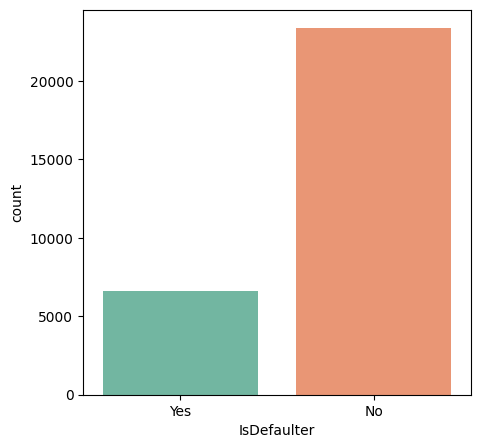

In [ ]:
#values count plot of IsDefaulter
plt.figure(figsize=(5,5))
sns.countplot(x = 'IsDefaulter', data = df, palette= "Set2")
plt.show()

***Here we can see that, Defaulters are less as compare to the Non-Defaulters in the given dataset.***
***And also we can see that both classes are not in proportion that is we have an imbalanced dataset.***

## **EDUCATION**

In [ ]:
#category wise values
df['EDUCATION'].value_counts()

University         14030
Graduate School    10585
High School         4917
5                    280
Others               123
6                     51
0                     14
Name: EDUCATION, dtype: int64

- In education column, values such as 5,6 and 0 are unknown. Lets combine those values as others.

In [ ]:
#replcae values with 5, 6 and 0 to Others
df.EDUCATION = df.EDUCATION.replace({5: "Others", 6: "Others",0: "Others"})

<Axes: xlabel='EDUCATION', ylabel='count'>

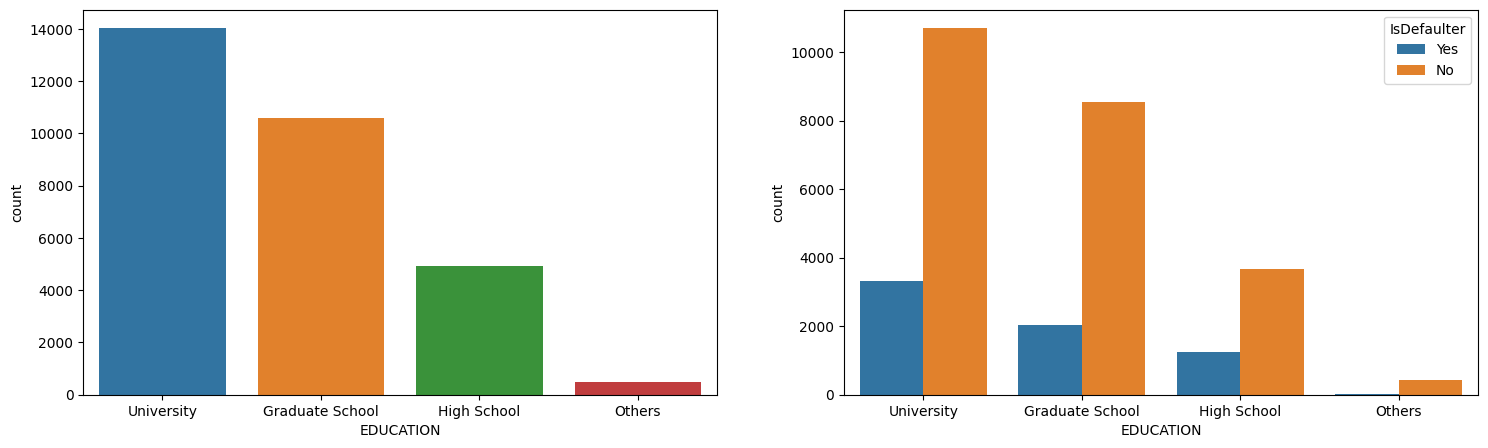

In [ ]:
#count plot for EDUCATION and with respect to IsDefaulter
fig, axes = plt.subplots(ncols=2,figsize=(18,5))
sns.countplot(x = 'EDUCATION', ax = axes[0], data = df)
sns.countplot(x = 'EDUCATION', hue = 'IsDefaulter',ax = axes[1], data = df)

***University and graduate school has maximum credit card holder.***

***As the number of university and graduate school credit card holder is higher their credit card default are also higher.***

#<b/>SEX:</b>

In [ ]:
#Checking value counts of SEX
df['SEX'].value_counts()

Female    18112
Male      11888
Name: SEX, dtype: int64

<Axes: xlabel='SEX', ylabel='count'>

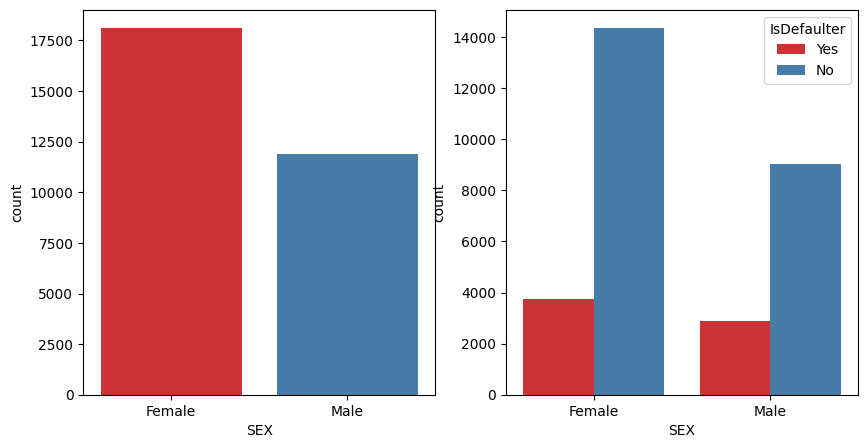

In [ ]:
#count plot for Sex and with respect to IsDefaulter
fig, axes = plt.subplots(ncols=2,figsize=(10,5))
sns.countplot(x = 'SEX', ax = axes[0], data = df, palette= "Set1")
sns.countplot(x = 'SEX', hue = 'IsDefaulter',ax = axes[1], data = df, palette= "Set1")

***Female credit card holders are more than male credit cards holders.***

***As the number of female credit card holder is more than male, their credit card defaults are also higher than male.***

## **MARRIAGE**

In [ ]:
#category wise values
df['MARRIAGE'].value_counts()

Single     15964
Married    13659
Others       323
0             54
Name: MARRIAGE, dtype: int64

- In marriage column, 0 values are not known. Combine those values in others category.

In [ ]:
#replace 0 with Others
df.MARRIAGE = df.MARRIAGE.replace({0: "Others"})

<Axes: xlabel='MARRIAGE', ylabel='count'>

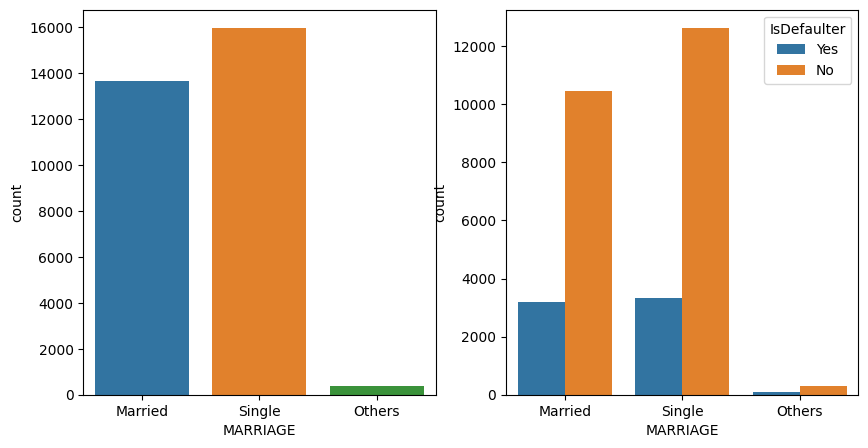

In [ ]:
#count plot for MARRIAGE and with respect to IsDefaulter
fig, axes = plt.subplots(ncols=2,figsize=(10,5))
sns.countplot(x = 'MARRIAGE', ax = axes[0], data = df)
sns.countplot(x = 'MARRIAGE', hue = 'IsDefaulter',ax = axes[1], data = df)

*** Number of credit card holder is maximum in singles.***

***But credit card defaults are almost same in case of single and married people. ***

## **AGE**

In [ ]:
#age wise values of credit card holder
df['AGE'].value_counts()

29    1605
27    1477
28    1409
30    1395
26    1256
31    1217
25    1186
34    1162
32    1158
33    1146
24    1127
35    1113
36    1108
37    1041
39     954
38     944
23     931
40     870
41     824
42     794
44     700
43     670
45     617
46     570
22     560
47     501
48     466
49     452
50     411
51     340
53     325
52     304
54     247
55     209
56     178
58     122
57     122
59      83
60      67
21      67
61      56
62      44
63      31
64      31
66      25
65      24
67      16
69      15
70      10
68       5
73       4
72       3
75       3
71       3
79       1
74       1
Name: AGE, dtype: int64

<Axes: xlabel='AGE', ylabel='count'>

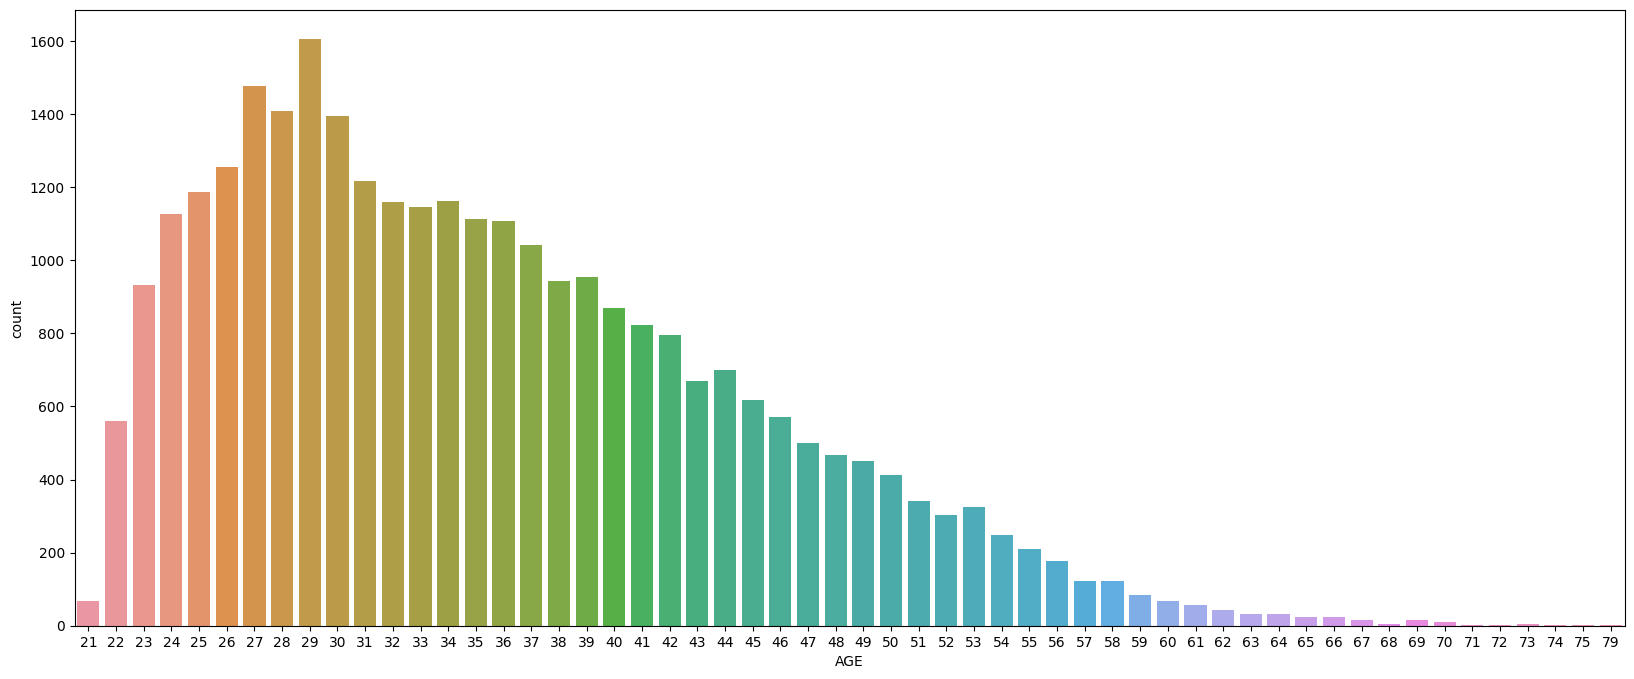

In [ ]:
#values count for AGE
plt.figure(figsize=(20,8))
sns.countplot(x = 'AGE', data = df)

<Axes: xlabel='AGE', ylabel='count'>

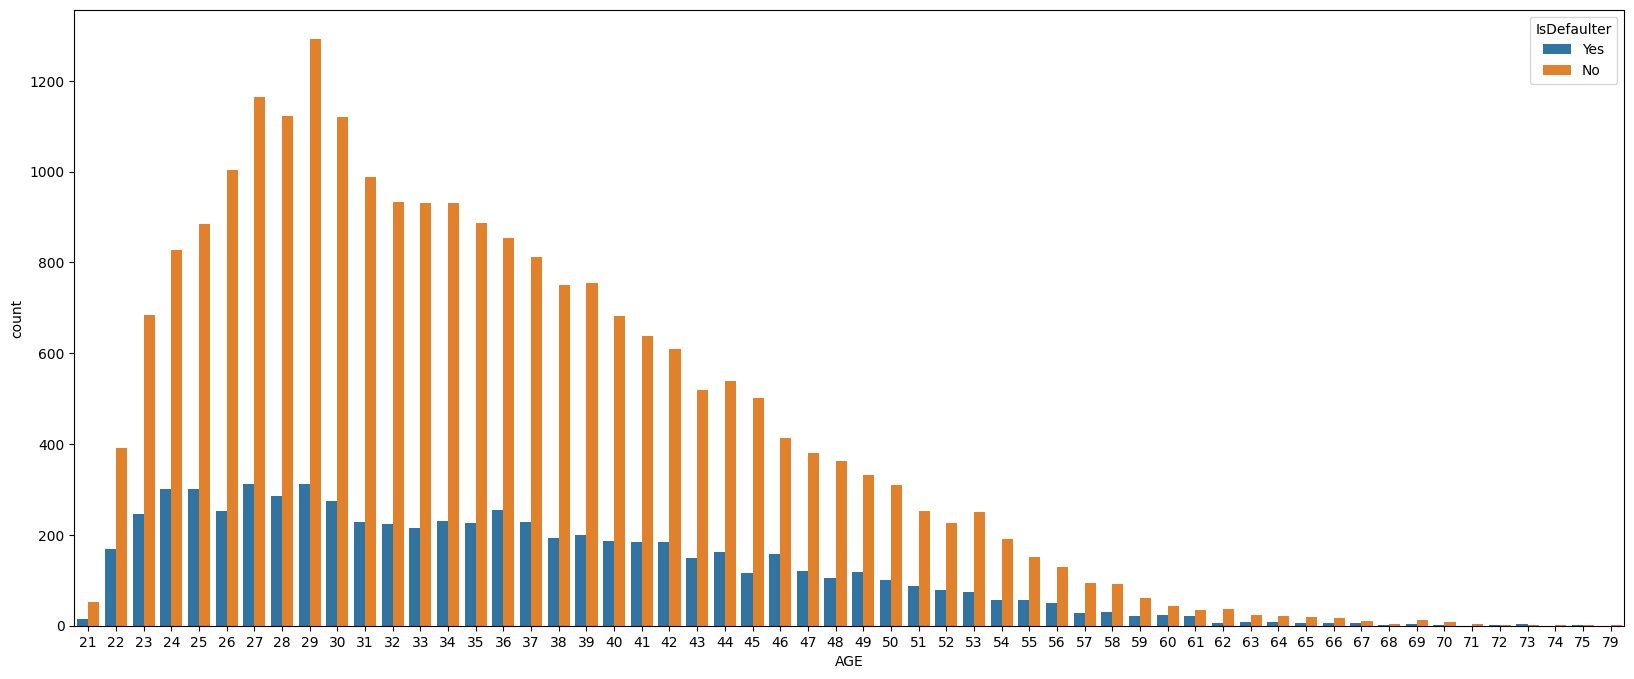

In [ ]:
#values count for Age with respect to IsDefaulter
plt.figure(figsize=(20,8))
sns.countplot(x = 'AGE', hue = 'IsDefaulter', data = df)

#<b/>Checking correlations</b>

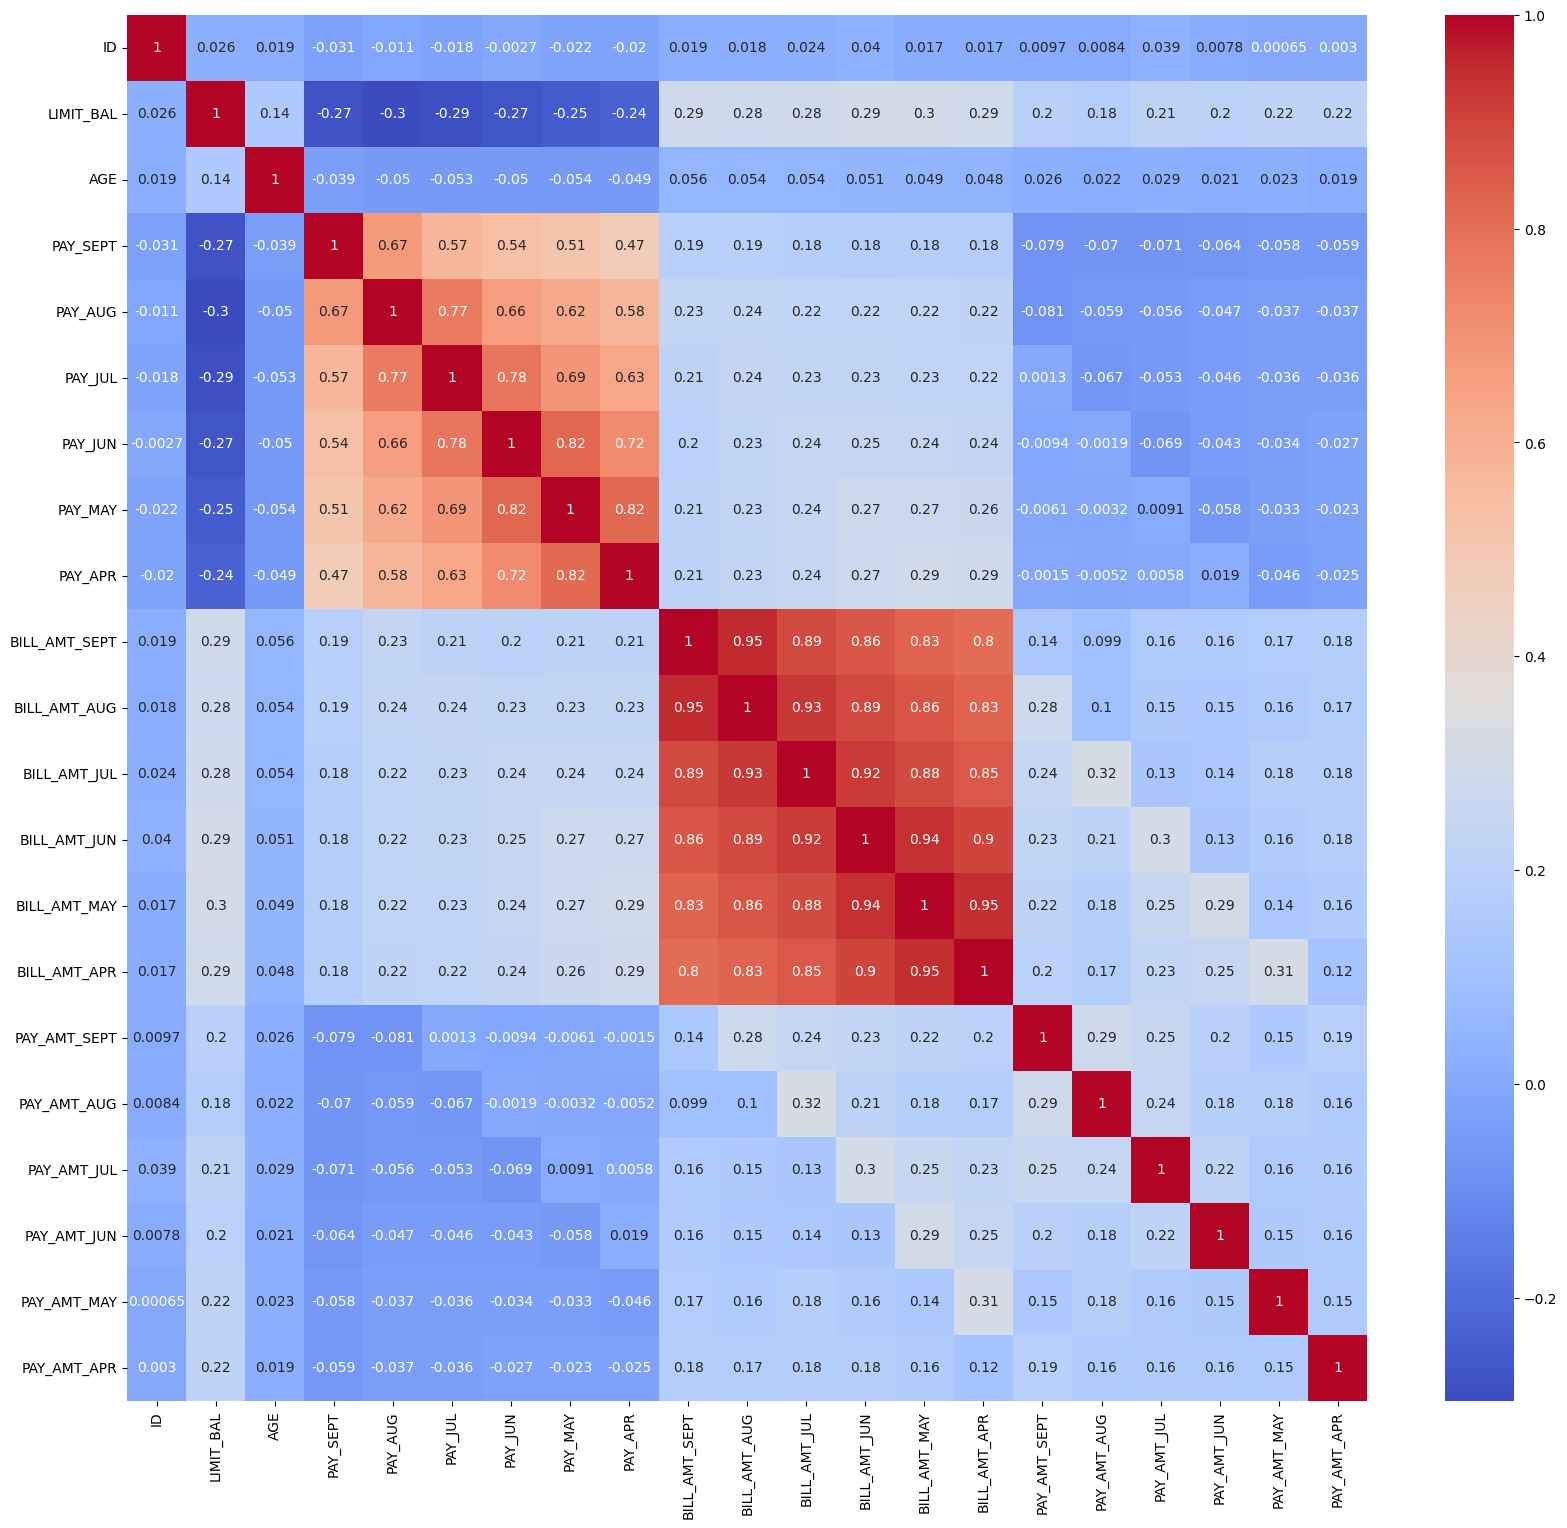

In [ ]:
plt.figure(figsize=(20,18))
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")
plt.show()